#<center> **Google Drive Mount**


In [1]:
# Mount ke Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#<center> **Libraries**

In [2]:
import os
# Image Processing
import cv2
import numpy as np
import pandas as pd
# Data Visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
# Evaluate Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

#<center> **Load Dataset**

In [3]:
data_dir = '/content/drive/MyDrive/SKRIPSI/MELON'

labels = os.listdir(data_dir)
print(labels)

img_size = 400

# Loop dataset tiap folder
data = []
for label in labels:
  path = os.path.join(data_dir, label)
  class_num = labels.index(label)
  for img in os.listdir(path):
    try:
      # Read & Resize image
      img_array = cv2.imread(os.path.join(path, img))
      new_array = cv2.resize(img_array, (img_size, img_size))
      data.append([new_array, class_num])
    except Exception as e:
      pass

X = []
y = []
for features, label in data:
  X.append(features)
  y.append(label)

# Normalize Pixel & Reshape
X = np.array(X) / 255.0
X = X.reshape(-1, img_size, img_size, 3)
y = np.array(y)

['64 HST', '74 HST', '77 HST', '84 HST']


# <center> **Split Dataset Train and Test**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **<center>Define CNN Model**

In [5]:
def create_cnn_model(neurons=128, dropout_rate=0.2):
    cnn_model = Sequential()
    cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
    cnn_model.add(MaxPooling2D((2, 2)))
    cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
    cnn_model.add(MaxPooling2D((2, 2)))
    cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
    cnn_model.add(MaxPooling2D((2, 2)))
    cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
    cnn_model.add(MaxPooling2D((2, 2)))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(neurons, activation='relu'))
    cnn_model.add(Dropout(dropout_rate))
    cnn_model.add(Dense(len(labels), activation='softmax'))
    cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return cnn_model

cnn_model = create_cnn_model()

# **<center>Train CNN Model**

In [6]:
cnn_history = cnn_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
13/13 [==============================] - 20s 461ms/step - loss: 1.5377 - accuracy: 0.2790 - val_loss: 1.3399 - val_accuracy: 0.1961
Epoch 2/50
13/13 [==============================] - 2s 182ms/step - loss: 1.2489 - accuracy: 0.4247 - val_loss: 1.1093 - val_accuracy: 0.4608
Epoch 3/50
13/13 [==============================] - 2s 184ms/step - loss: 1.0096 - accuracy: 0.5407 - val_loss: 0.8773 - val_accuracy: 0.5882
Epoch 4/50
13/13 [==============================] - 2s 169ms/step - loss: 0.9536 - accuracy: 0.5728 - val_loss: 0.7906 - val_accuracy: 0.6275
Epoch 5/50
13/13 [==============================] - 2s 160ms/step - loss: 0.8035 - accuracy: 0.6519 - val_loss: 0.8112 - val_accuracy: 0.6667
Epoch 6/50
13/13 [==============================] - 2s 167ms/step - loss: 0.6452 - accuracy: 0.7432 - val_loss: 0.9355 - val_accuracy: 0.6471
Epoch 7/50
13/13 [==============================] - 2s 159ms/step - loss: 0.5604 - accuracy: 0.7877 - val_loss: 0.7961 - val_accuracy: 0.6471
Epoch

# **<center>Define ANN Model**

In [7]:
def create_ann_model():
    ann_model = Sequential()
    ann_model.add(Dense(128, input_shape=(img_size * img_size * 3,), activation='relu'))
    ann_model.add(Dropout(0.5))
    ann_model.add(Dense(64, activation='relu'))
    ann_model.add(Dropout(0.5))
    ann_model.add(Dense(len(labels), activation='softmax'))
    ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return ann_model

ann_model = create_ann_model()

# **<center>Flatten Input Image**

In [8]:
X_train_flatten = X_train.reshape(-1, img_size * img_size * 3)
X_test_flatten = X_test.reshape(-1, img_size * img_size * 3)

# **<center>Train ANN Model**

In [9]:
ann_history = ann_model.fit(X_train_flatten, y_train, epochs=50, validation_data=(X_test_flatten, y_test))

Epoch 1/50
13/13 [==============================] - 3s 107ms/step - loss: 150.1024 - accuracy: 0.2864 - val_loss: 20.2043 - val_accuracy: 0.2255
Epoch 2/50
13/13 [==============================] - 1s 62ms/step - loss: 9.3084 - accuracy: 0.2593 - val_loss: 1.3859 - val_accuracy: 0.2941
Epoch 3/50
13/13 [==============================] - 1s 61ms/step - loss: 1.3864 - accuracy: 0.2346 - val_loss: 1.3864 - val_accuracy: 0.2941
Epoch 4/50
13/13 [==============================] - 1s 60ms/step - loss: 1.3862 - accuracy: 0.2346 - val_loss: 1.3872 - val_accuracy: 0.2941
Epoch 5/50
13/13 [==============================] - 1s 60ms/step - loss: 1.3855 - accuracy: 0.2346 - val_loss: 1.3881 - val_accuracy: 0.2941
Epoch 6/50
13/13 [==============================] - 1s 59ms/step - loss: 1.3854 - accuracy: 0.2346 - val_loss: 1.3892 - val_accuracy: 0.1863
Epoch 7/50
13/13 [==============================] - 1s 61ms/step - loss: 1.3849 - accuracy: 0.2864 - val_loss: 1.3902 - val_accuracy: 0.1863
Epoch 8/5

# **<center>Evaluate CNN Model**




In [10]:
cnn_loss, cnn_acc = cnn_model.evaluate(X_test, y_test)
print(f"CNN Test Loss: {cnn_loss:.3f}")
print(f"CNN Test Accuracy: {cnn_acc*100:.2f}%")

4/4 [==============================] - 0s 55ms/step - loss: 3.1840 - accuracy: 0.6569
CNN Test Loss: 3.184
CNN Test Accuracy: 65.69%


# **<center>Evaluate ANN Model**

In [11]:
ann_loss, ann_acc = ann_model.evaluate(X_test_flatten, y_test)
print(f"ANN Test Loss: {ann_loss:.3f}")
print(f"ANN Test Accuracy: {ann_acc*100:.2f}%")

4/4 [==============================] - 0s 23ms/step - loss: 1.4096 - accuracy: 0.1863
ANN Test Loss: 1.410
ANN Test Accuracy: 18.63%


# **<center>Predictions**

In [12]:
cnn_predictions = np.argmax(cnn_model.predict(X_test), axis=-1)
ann_predictions = np.argmax(ann_model.predict(X_test_flatten), axis=-1)

4/4 [==============================] - 0s 22ms/step


# **<center>Classification Report**

In [13]:
print("CNN Classification Report:")
print(classification_report(y_test, cnn_predictions, target_names=labels))
print("ANN Classification Report:")
print(classification_report(y_test, ann_predictions, target_names=labels, zero_division=1))

CNN Classification Report:
              precision    recall  f1-score   support

      64 HST       0.78      0.97      0.87        30
      74 HST       0.67      0.63      0.65        19
      77 HST       0.35      0.38      0.36        21
      84 HST       0.75      0.56      0.64        32

    accuracy                           0.66       102
   macro avg       0.64      0.64      0.63       102
weighted avg       0.66      0.66      0.65       102

ANN Classification Report:
              precision    recall  f1-score   support

      64 HST       1.00      0.00      0.00        30
      74 HST       0.19      1.00      0.31        19
      77 HST       1.00      0.00      0.00        21
      84 HST       1.00      0.00      0.00        32

    accuracy                           0.19       102
   macro avg       0.80      0.25      0.08       102
weighted avg       0.85      0.19      0.06       102



# **<center>Confusion Matrix**

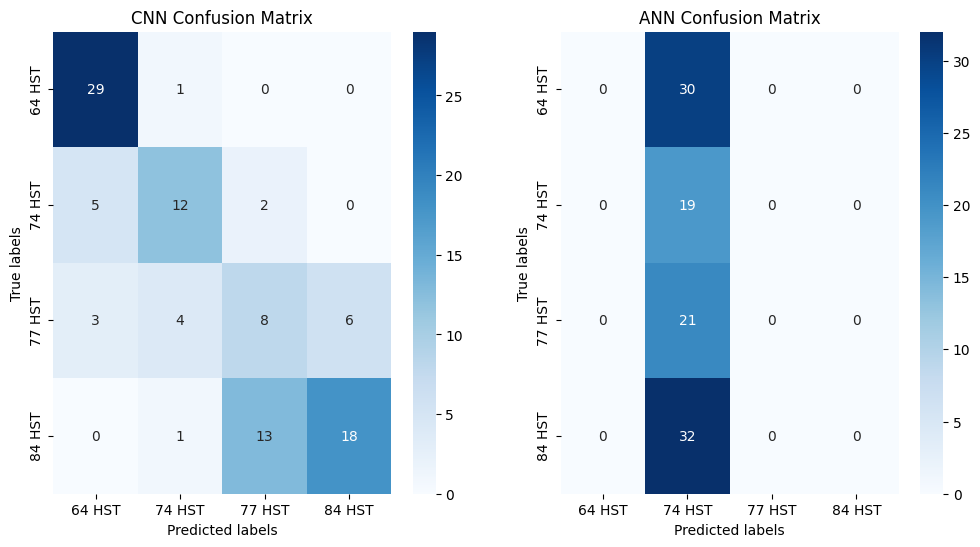

In [14]:
# Define the class names
class_names = labels

# Plot the confusion matrices
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

cnn_cm = confusion_matrix(y_test, cnn_predictions, labels=range(len(class_names)))
sns.heatmap(cnn_cm, annot=True, fmt='g', cmap='Blues', ax=axs[0], xticklabels=class_names, yticklabels=class_names)
axs[0].set_xlabel('Predicted labels')
axs[0].set_ylabel('True labels')
axs[0].set_title('CNN Confusion Matrix')

ann_cm = confusion_matrix(y_test, ann_predictions, labels=range(len(class_names)))
sns.heatmap(ann_cm, annot=True, fmt='g', cmap='Blues', ax=axs[1], xticklabels=class_names, yticklabels=class_names)
axs[1].set_xlabel('Predicted labels')
axs[1].set_ylabel('True labels')
axs[1].set_title('ANN Confusion Matrix')

plt.show()


# <center> **Grid Search**

In [15]:
# Define a function to create the CNN model

def create_cnn_model(filters, kernel_size, pool_size):
    cnn_model = Sequential()
    cnn_model.add(Conv2D(filters, kernel_size, activation='relu', input_shape=X_train.shape[1:]))
    cnn_model.add(MaxPooling2D((2, 2)))
    cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
    cnn_model.add(MaxPooling2D((2, 2)))
    cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
    cnn_model.add(MaxPooling2D((2, 2)))
    cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
    cnn_model.add(MaxPooling2D((2, 2)))

    cnn_model.add(Flatten())
    cnn_model.add(Dense(128, activation='relu'))
    cnn_model.add(Dropout(0.2))
    cnn_model.add(Dense(len(labels), activation='softmax'))
    cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return cnn_model

# def create_cnn_model(filters, kernel_size, pool_size, neurons, dropout_rate):
#     cnn_model = Sequential()
#     cnn_model.add(Conv2D(filters, kernel_size, activation='relu', input_shape=X_train.shape[1:]))
#     cnn_model.add(MaxPooling2D(pool_size=pool_size))
#     cnn_model.add(Conv2D(filters, kernel_size, activation='relu'))
#     cnn_model.add(MaxPooling2D(pool_size=pool_size))
#     cnn_model.add(Conv2D(filters, kernel_size, activation='relu'))
#     cnn_model.add(MaxPooling2D(pool_size=pool_size))
#     cnn_model.add(Conv2D(filters, kernel_size, activation='relu'))
#     cnn_model.add(MaxPooling2D(pool_size=pool_size))

#     cnn_model.add(Flatten())
#     cnn_model.add(Dense(neurons, activation='relu'))
#     cnn_model.add(Dropout(dropout_rate))
#     cnn_model.add(Dense(len(labels), activation='softmax'))
#     cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     return cnn_model

# Define a function to create the ANN model
# def create_ann_model(neurons, dropout_rate):
#     ann_model = Sequential()
#     ann_model.add(Dense(neurons, input_shape=(img_size * img_size * 3,), activation='relu'))
#     ann_model.add(Dropout(dropout_rate))
#     ann_model.add(Dense(neurons, activation='relu'))
#     ann_model.add(Dropout(dropout_rate))
#     ann_model.add(Dense(len(labels), activation='softmax'))
#     ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     return ann_model

In [16]:
# Define the hyperparameters to search over
cnn_param_grid = {
    'filters': [16, 32, 64],
    'kernel_size': [(3, 3), (5, 5), (7, 7)],
    'pool_size': [(2, 2), (3, 3)],
    # 'neurons': [32, 64, 128],
    # 'dropout_rate': [0.2, 0.3]
}

# ann_param_grid = {
#     'neurons': [32, 64, 128],
#     'dropout_rate': [0.2, 0.3]
# }

In [ ]:
# Create the Keras classifiers
cnn_model = KerasClassifier(build_fn=create_cnn_model, epochs=10, batch_size=32, verbose=0)
# ann_model = KerasClassifier(build_fn=create_ann_model, epochs=10, batch_size=32, verbose=0)

# Perform the grid search for the CNN model
cnn_grid_search = GridSearchCV(estimator=cnn_model, param_grid=cnn_param_grid, cv=3, verbose=2)
cnn_grid_search.fit(X_train, y_train)

# Perform the grid search for the ANN model
# ann_grid_search = GridSearchCV(estimator=ann_model, param_grid=ann_param_grid, cv=3, verbose=2)
# ann_grid_search.fit(X_train, y_train)

# Print the best hyperparameters for each model
print("CNN Best Hyperparameters:", cnn_grid_search.best_params_)
# print("ANN Best Hyperparameters:", ann_grid_search.best_params_)


<ipython-input-17-deb92aff59ed>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  cnn_model = KerasClassifier(build_fn=create_cnn_model, epochs=10, batch_size=32, verbose=0)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
